# Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.18422099602965 -132.1646559321317
2.942080056316186 -88.14786585104571
85.40073397113474 -99.46665545740258
-4.573632523480342 118.51860558343918
52.15215163099592 -178.51553322595842
57.105046529014515 -100.24868095077804
3.344480264577271 -95.42900802842252
-70.07182339580909 -62.22756017568531
31.207884501095506 158.40676659362055
21.387564892181416 37.48627530713486
-66.38361831330906 64.78572090014373
-8.977686308678273 149.3706404761681
-40.581395475700994 -164.37279827665014
5.127238442424726 16.002376378720868
-35.28504910965604 116.59882802111042
63.045357635181546 -59.531313596487735
81.729016058789 -128.02872475088563
80.40487369925998 -131.39771727610193
-71.50672885686085 -55.886071665785806
7.754283349269826 -150.02881442180868
-13.029381702944661 117.11823566028738
-13.60846708362368 51.95704631694474
77.36980132745097 -138.7571034689462
16.257494992941517 -32.51403410547789
-60.04421088650038 -174.07494624423384
19.717186106628546 -50.663104608642755
-20.16373676790

-32.40033857885528 -30.929651978958077
3.4136748804984762 -45.75852965305759
-89.01785964497267 -13.990847369250929
-43.952929876131485 -23.587183651519524
-33.02892641290044 100.1739239780548
88.50283595456418 179.73756754448993
18.276950749281866 87.26213508709253
-70.47184770702809 136.29151502639286
87.89630372611208 55.542706062034625
-50.473500829491165 -109.7027695335355
-7.832400203927051 -60.565039319094225
-62.13296801052336 -172.6223429702326
-74.92414144309423 75.03097226864332
-70.70521075199565 131.67388424605036
-30.674018354337406 179.99455740179377
66.31017140940281 166.33672327785746
-15.887868605685938 -133.01867579651636
-58.206186726535236 -113.94312307517548
28.652013215584105 -34.91011933996751
24.566640269915027 93.3308484466811
-85.90029445075662 59.46696593275831
29.55708840810749 -76.31724318606109
83.05970032150702 154.15443498845838
15.334681766818335 -176.17776746579133
55.89980107659866 23.350905489195924
-45.32450962680958 170.9500254302829
-44.076009308

-49.621441022379756 -162.64038134250856
-50.59585287623052 -113.82134853032223
5.392810399339012 93.24121224599367
-20.913492498716238 -87.39966153235964
-43.67903857163085 -31.730479044868133
-28.366762058530497 -17.89594271847082
83.2736702701049 -4.285658650581183
-64.51040521425432 71.70863595240377
20.003229068559506 43.41397111292136
75.86486603314509 63.215041997166566
-64.37054897543078 -8.013310044022745
12.33710374403043 -84.20601335872881
-28.763259216779204 -139.6842152955335
41.75019393639113 178.449847820034
67.31487204157824 -159.00342190338424
26.53024220563995 -125.11153580556129
-17.315552382267086 24.605409352587003
47.11869844911001 5.197299161026251
-46.346924395032325 -65.2518492353609
-42.084910637339036 140.1716896435811
14.581411902343177 22.336672640708287
-9.266625431915315 3.0775241559402673
19.92125832850944 57.241839391409826
80.16019849969891 -157.39612442756243
75.3773299535521 56.5308193524254
-44.791240394136025 31.338383921827727
62.07882137342801 17.

73.7776400279858 -139.3347578733824
-13.933122569535527 58.89694859102153
61.60879068259689 35.878379665241084
-82.01754084132708 -77.56838276130989
-89.19221060013166 -21.951081981301826
59.918995497426494 -124.73056333212749
24.683038157585585 93.48856558931624
-14.46714134311776 -161.39062079194758
2.3379883675884088 -154.25111333457582
33.69861848930479 -143.15707387814751
-65.21391192991543 -145.81618608853978
85.03172126467092 -116.94486928248509
25.934133850594378 -95.99739212847025
86.05113590545133 71.91143789536378
-20.335443324489987 17.19606538200415
-87.7841482182171 66.80101158802515
70.96440006587056 -91.65286611697145
28.734179143178963 169.56701478251267
-30.029979112211848 37.501187652730295
-67.8260513253392 -13.916311537252597
50.801783298955314 -14.825278090257513
64.11909470301882 -155.95992068182045
21.924882152502704 -147.30052713167936
15.235231107208705 -160.2239336948024
34.49041895311281 97.178255026246
-64.69199650608095 136.41491195019682
75.38909160595423

Import the citipy module in our WeatherPy file

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API reuqest for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
       
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | puerto baquerizo moreno
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | makasar
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | jiddah
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | popondetta
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | carnot
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | praya
Processing Record 20 of Set 1 | sambava
Processing Record 21 of Se

Processing Record 36 of Set 4 | hamilton
Processing Record 37 of Set 4 | lolua
City not found. Skipping...
Processing Record 38 of Set 4 | alotau
City not found. Skipping...
Processing Record 39 of Set 4 | husavik
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | navlya
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | neuquen
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | gimli
Processing Record 49 of Set 4 | paracuru
Processing Record 50 of Set 4 | kambove
Processing Record 1 of Set 5 | luganville
Processing Record 2 of Set 5 | peleduy
Processing Record 3 of Set 5 | angoche
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | bolshaya dzhalga
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | kamienna gora
Proces

Processing Record 25 of Set 8 | cockburn town
Processing Record 26 of Set 8 | emerald
Processing Record 27 of Set 8 | gat
Processing Record 28 of Set 8 | ovalle
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | faya
Processing Record 31 of Set 8 | culebra
Processing Record 32 of Set 8 | boyolangu
Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | kharp
Processing Record 35 of Set 8 | pindi gheb
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | khudumelapye
Processing Record 38 of Set 8 | kearney
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | muli
Processing Record 41 of Set 8 | camp verde
Processing Record 42 of Set 8 | san andres
Processing Record 43 of Set 8 | bjornevatn
Processing Record 44 of Set 8 | santa cruz
Processing Record 45 of Set 8 | kashi
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | maniitsoq
Processing Record 48 of Set 8 | lubango
Processing Record 4

Processing Record 11 of Set 12 | kuche
City not found. Skipping...
Processing Record 12 of Set 12 | port hawkesbury
Processing Record 13 of Set 12 | srednekolymsk
Processing Record 14 of Set 12 | poso
Processing Record 15 of Set 12 | harper
Processing Record 16 of Set 12 | ixtapa
Processing Record 17 of Set 12 | humaita
Processing Record 18 of Set 12 | shetpe
Processing Record 19 of Set 12 | abu dhabi
Processing Record 20 of Set 12 | yacuiba
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | glinka
Processing Record 23 of Set 12 | inongo
Processing Record 24 of Set 12 | impfondo
Processing Record 25 of Set 12 | kutum
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | ahipara
Processing Record 28 of Set 12 | camocim
Processing Record 29 of Set 12 | starobaltachevo
Processing Record 30 of Set 12 | casper
Processing Record 31 of Set 12 | hun
Processing Record 32 of Set 12 | fare
Processing Record 33 of Set 12 | vytegra
Processing Record 34

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.26,77,0,5.70,PF,2022-07-21 03:55:03
1,Puerto Baquerizo Moreno,-0.9000,-89.6000,69.24,78,97,14.74,EC,2022-07-21 03:55:53
2,Yellowknife,62.4560,-114.3525,66.72,45,75,5.75,CA,2022-07-21 03:55:54
3,Makasar,-5.1400,119.4221,89.65,62,20,2.30,ID,2022-07-21 03:55:54
4,Provideniya,64.3833,-173.3000,44.71,70,75,18.01,RU,2022-07-21 03:55:54
5,Thompson,55.7435,-97.8558,62.76,77,40,4.61,CA,2022-07-21 03:53:11
6,Puerto Ayora,-0.7393,-90.3518,68.56,96,75,1.99,EC,2022-07-21 03:55:55
7,Ushuaia,-54.8000,-68.3000,29.86,86,75,13.80,AR,2022-07-21 03:55:55
8,Popondetta,-8.7537,148.2534,88.95,52,87,7.83,PG,2022-07-21 03:55:57
9,Avarua,-21.2078,-159.7750,71.65,73,75,17.27,CK,2022-07-21 03:55:58


In [17]:
new_city_data_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_data_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-21 03:55:03,-23.1203,-134.9692,73.26,77,0,5.70
1,Puerto Baquerizo Moreno,EC,2022-07-21 03:55:53,-0.9000,-89.6000,69.24,78,97,14.74
2,Yellowknife,CA,2022-07-21 03:55:54,62.4560,-114.3525,66.72,45,75,5.75
3,Makasar,ID,2022-07-21 03:55:54,-5.1400,119.4221,89.65,62,20,2.30
4,Provideniya,RU,2022-07-21 03:55:54,64.3833,-173.3000,44.71,70,75,18.01
5,Thompson,CA,2022-07-21 03:53:11,55.7435,-97.8558,62.76,77,40,4.61
6,Puerto Ayora,EC,2022-07-21 03:55:55,-0.7393,-90.3518,68.56,96,75,1.99
7,Ushuaia,AR,2022-07-21 03:55:55,-54.8000,-68.3000,29.86,86,75,13.80
8,Popondetta,PG,2022-07-21 03:55:57,-8.7537,148.2534,88.95,52,87,7.83
9,Avarua,CK,2022-07-21 03:55:58,-21.2078,-159.7750,71.65,73,75,17.27


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Get Data for Plotting

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

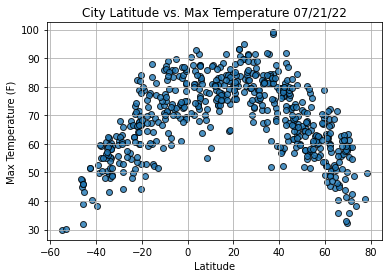

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

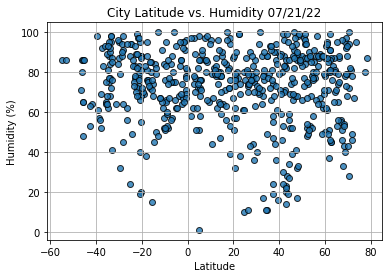

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

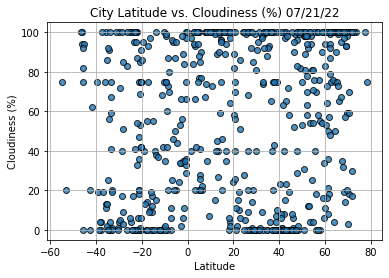

In [29]:
# Build the scatter plots for latitude vs cloudiness. 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properities.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plt.
plt.show()

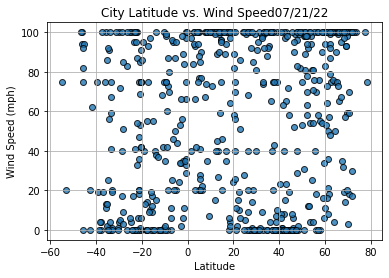

In [30]:
# Build the scatter plots for latitude vs cloudiness. 
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properities.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plt.
plt.show()